Cluster labels: [ 0  0  0  1  1 -1]


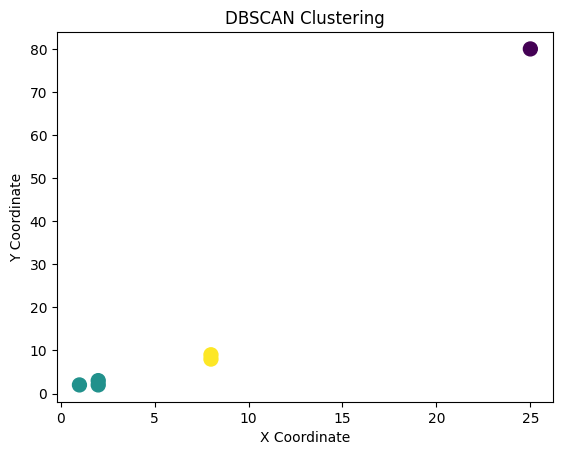

In [6]:
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Example 2D coordinates
coordinates = np.array([
    [1, 2], [2, 3], [2, 2], [8, 8], [8, 9], [25, 80]
])

# DBSCAN parameters
epsilon = 2  # Maximum distance between two samples to be considered in the same cluster
min_samples = 2  # Minimum number of points to form a cluster

# Perform DBSCAN clustering
db = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = db.fit_predict(coordinates)

# Print cluster labels (-1 indicates noise)
print("Cluster labels:", clusters)

# Plot the results
plt.scatter(coordinates[:, 0], coordinates[:, 1], c=clusters, cmap='viridis', s=100)
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("DBSCAN Clustering")
plt.show()

Cluster assignments: {0: 0, 1: 0, 2: 0, 3: 1, 4: 1, 5: 2}


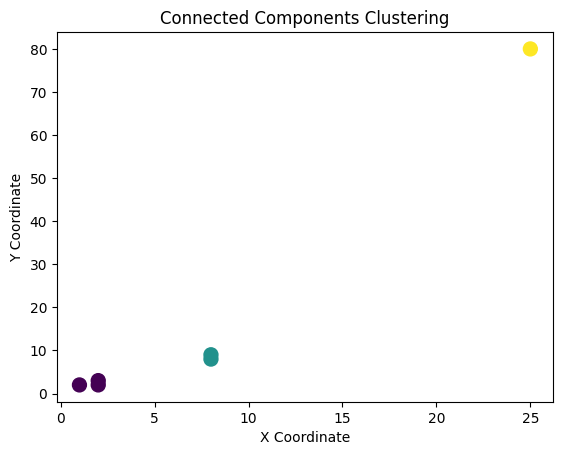

In [3]:
import numpy as np
import networkx as nx
from sklearn.neighbors import radius_neighbors_graph
import matplotlib.pyplot as plt

# Example 2D coordinates
coordinates = np.array([
    [1, 2], [2, 3], [2, 2], [8, 8], [8, 9], [25, 80]
])

# Build a graph where points within a distance of 3 are connected
distance_threshold = 3
graph = radius_neighbors_graph(coordinates, radius=distance_threshold, mode='connectivity')

# Convert sparse matrix to a NetworkX graph
G = nx.from_scipy_sparse_matrix(graph)

# Find connected components (each component is a cluster)
components = list(nx.connected_components(G))
clusters = {i: idx for idx, component in enumerate(components) for i in component}

# Print cluster assignments
print("Cluster assignments:", clusters)

# Visualize
colors = [clusters[i] for i in range(len(coordinates))]
plt.scatter(coordinates[:, 0], coordinates[:, 1], c=colors, cmap='viridis', s=100)
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Connected Components Clustering")
plt.show()

Cluster labels: [1 3 1 2 3 0]


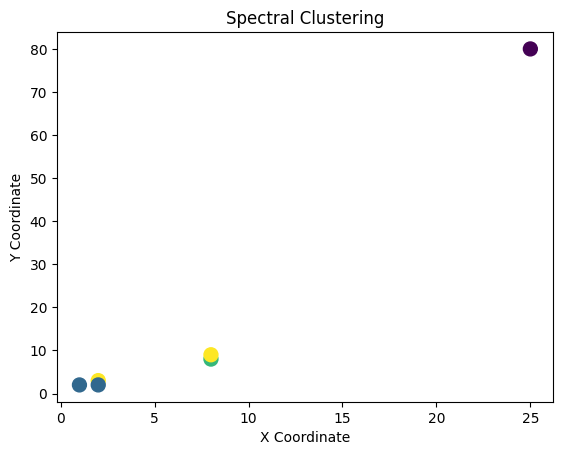

In [8]:
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

# Example 2D coordinates
coordinates = np.array([
    [1, 2], [2, 3], [2, 2], [8, 8], [8, 9], [25, 80]
])

# Spectral clustering (number of clusters is optional)
spectral = SpectralClustering(
    n_clusters=4, affinity='nearest_neighbors', n_neighbors=3
)
labels = spectral.fit_predict(coordinates)

# Print cluster assignments
print("Cluster labels:", labels)

# Visualize
plt.scatter(coordinates[:, 0], coordinates[:, 1], c=labels, cmap='viridis', s=100)
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Spectral Clustering")
plt.show()

In [23]:
def getID(name,address,category):
    #as long as there is a '-', then return -2
    #if there is an empty list, then return []
    #if the information doesn't match, return -1

    if name == "-" and address == "-":
        return -2

    #normal case
    idFromName = []
    idFromAddress = []

    address = address.split(",")[0]
    
    #restaurants
    if category == 'restaurants':
        for restaurant in restaurants:
            if restaurant['name'].lower() == name.lower():
                idFromName.append(restaurant['business_id'])
            if restaurant['address'].lower() == address.lower():
                idFromAddress.append(restaurant['business_id'])
        set1 = set(idFromName)
        set2 = set(idFromAddress)
        #if the extracted id from name and address make an agreement
        if(len(set1 & set2) == 1):
            return list(set1 & set2)[0]
        # we have to use similarity score to determine the id
        else:
            name_sim_score = []
            address_sim_score = []

            for restaurant in restaurants:
                name_sim_score.append(fuzz.ratio(name.lower(), restaurant['name'].lower()))
                address_sim_score.append(fuzz.ratio(address.lower(), restaurant['address'].lower()))

            scores = np.array(name_sim_score) + np.array(address_sim_score)
            #if the score is high enough, then we claim the id
            if max(scores) >= 120:
                return restaurants[np.argmax(scores)]['business_id']
            #if the score is less than 60 for each, then we indicate that the business is out of the pool
            else:
                return -1
    #attractions
    if category == 'attractions':
        for attraction in attractions:
            if attraction['name'].lower() == name.lower():
                idFromName.append(attraction['business_id'])
            if attraction['address'].lower() == address.lower():
                idFromAddress.append(attraction['business_id'])
        
        set1 = set(idFromName)
        set2 = set(idFromAddress)

        if(len(set1 & set2) == 1):
            return list(set1 & set2)[0]
        else:
            name_sim_score = []
            address_sim_score = []

            for attraction in attractions:
                name_sim_score.append(fuzz.ratio(name.lower(), attraction['name'].lower()))
                address_sim_score.append(fuzz.ratio(address.lower(), attraction['address'].lower()))

            if max(name_sim_score) == 100:
                return attractions[np.argmax(name_sim_score)]['business_id']

            scores = np.array(name_sim_score) + np.array(address_sim_score)
            if max(scores) >= 120:
                return attractions[np.argmax(scores)]['business_id']
            else:
                return -1
    #hotels
    if category == 'hotels':
        for hotel in hotels:
            if hotel['name'].lower() == name.lower():
                idFromName.append(hotel['business_id'])
            if hotel['address'].lower() == address.lower():
                idFromAddress.append(hotel['business_id'])
        set1 = set(idFromName)
        set2 = set(idFromAddress)
        if(len(set1 & set2) == 1):
            return list(set1 & set2)[0]
        else:
            name_sim_score = []
            address_sim_score = []

            for hotel in hotels:
                name_sim_score.append(fuzz.ratio(name.lower(), hotel['name'].lower()))
                address_sim_score.append(fuzz.ratio(address.lower(), hotel['address'].lower()))

            scores = np.array(name_sim_score) + np.array(address_sim_score)
            if max(scores) >= 120:
                return hotels[np.argmax(scores)]['business_id']
            else:
                return -1

def prepareEval(plan):
    plan_eval = []
    for days in plan['itinerary']:
        day = {}
        day['days'] = days['days']
        day['breakfast'] = getID(days['breakfast']['name'],days['breakfast']['address'],'restaurants')
        day['morning_attractions'] = [getID(attraction['name'],attraction['address'],'attractions') for attraction in days['morning_attractions']]
        day['lunch'] = getID(days['lunch']['name'],days['lunch']['address'],'restaurants')
        day['afternoon_attractions'] = [getID(attraction['name'],attraction['address'],'attractions') for attraction in days['afternoon_attractions']]
        day['dinner'] = getID(days['dinner']['name'],days['dinner']['address'],'restaurants')
        day['night_attractions'] = [getID(attraction['name'],attraction['address'],'attractions') for attraction in days['night_attractions']]
        day['accommodation'] = getID(days['accommodation']['name'],days['accommodation']['address'],'hotels')
        plan_eval.append(day)
    return plan_eval

import json

In [26]:
with open ('../Datasets/Restaurants_task1.jsonl', 'r') as file:
    restaurants = [json.loads(line.strip()) for line in file]

with open ('../Datasets/Hotels_task1.jsonl', 'r') as file:
    hotels = [json.loads(line.strip()) for line in file]

with open ('../Datasets/Attractions_task1.jsonl', 'r') as file:
    attractions = [json.loads(line.strip()) for line in file]

In [27]:
with open('../Task2/Outputs/evals/gpt4omini/Plan_Eval_1.json') as f:
    plan = json.load(f)

processed_plan = prepareEval(plan)
processed_plan

[{'days': 'Day 1',
  'breakfast': 'U30ggGzFpXvc2NZYwOW3qg',
  'morning_attractions': ['V7KWP_nQkpSxR3t7bEqrMw'],
  'lunch': 'waWvlZPOgPkfSTsnCju4aA',
  'afternoon_attractions': ['uwF2zLAnZZ1SCwEF8QQKQA'],
  'dinner': '9OhPfV0C3Q49l5tSre2MuQ',
  'night_attractions': ['IvAa7PvfOYl0xRML5W3ebg'],
  'accommodation': 'zy2p8yfx_fgXMCCUo8nWsA'},
 {'days': 'Day 2',
  'breakfast': 'jOaJ4PFGhGiM8fhuYcYFRg',
  'morning_attractions': ['2OpdiV_aHk87jCBpY8P6lQ'],
  'lunch': 'W23Gvu7dJDjPq3PC8Q-f6A',
  'afternoon_attractions': ['ajF4K4G-gJtNVy0P2paJpA'],
  'dinner': 'TbjqvdrSBm27arbKbReRfg',
  'night_attractions': ['PsmEYy55HF3epGGbCgIOzA'],
  'accommodation': 'zy2p8yfx_fgXMCCUo8nWsA'},
 {'days': 'Day 3',
  'breakfast': 'YN4Kk751tmdvoarGo8z7_A',
  'morning_attractions': ['FtyrXpqxGT0Py-940r1VRg'],
  'lunch': 'EzjysPg2-lVX1E0ibStUXw',
  'afternoon_attractions': ['0bClMPygqjmGYspg--VyIA'],
  'dinner': 'qtyNbCXut-RQnnEQNJ9UzA',
  'night_attractions': ['P6DuASe2aZmNSKm1MR9PEw'],
  'accommodation': 'zy2p8y

Cluster Labels: [2 2 2 0 0 0 1 1 1]
Centroids: [[11. 11.]
 [21. 21.]
 [ 2.  3.]]


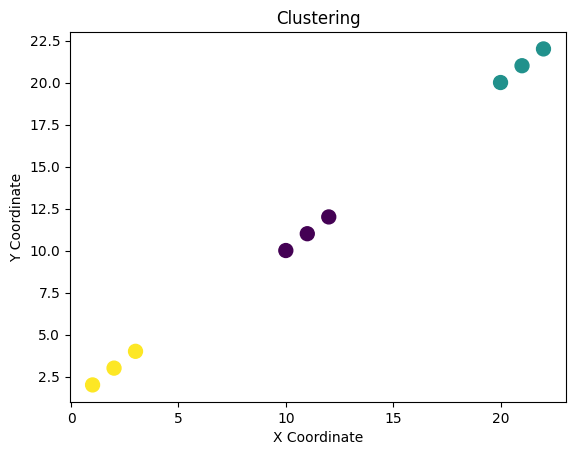

In [13]:
from sklearn.cluster import KMeans
import numpy as np

# Example coordinates
coordinates = np.array([[1, 2], [2, 3], [3, 4], [10, 10], [11, 11], [12, 12],[20,20],[21,21],[22,22]])

# Desired number of clusters
k = 3

# Apply K-Means
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(coordinates)

# Cluster labels
labels = kmeans.labels_

# Centroid positions
centroids = kmeans.cluster_centers_

print("Cluster Labels:", labels)
print("Centroids:", centroids)

# Visualize
plt.scatter(coordinates[:, 0], coordinates[:, 1], c=labels, cmap='viridis', s=100)
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Clustering")
plt.show()


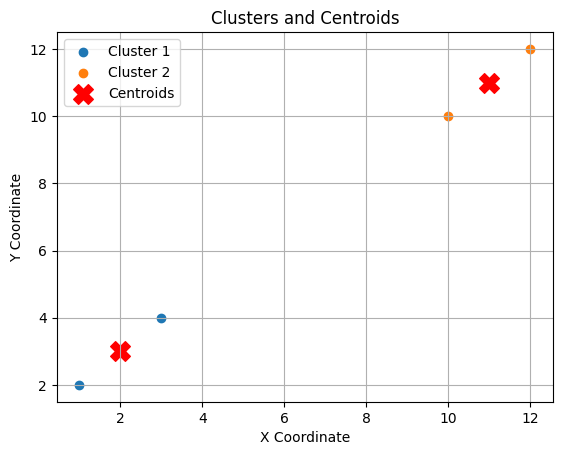

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Example coordinates
coordinates = np.array([[1, 2], [2, 3], [3, 4], [10, 10], [11, 11], [12, 12]])

# Desired number of clusters
k = 2

# Apply K-Means
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(coordinates)

# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot data points with cluster labels
for i in range(k):
    cluster_points = coordinates[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {i + 1}")

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c="red", marker="X", s=200, label="Centroids")

# Add titles and legend
plt.title("Clusters and Centroids")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()
plt.grid(True)
plt.show()
